# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Read the dataset
df = pd.read_csv('D:\DATA SC_Practice Project\\eva\\Avocado.csv')
print("Total Number of samples: %d" % len(data))
df.head(5)

Total Number of samples: 18249


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- There are 16468 rows and 14 columns
- There is an Unnamed: 0 column which we will have to remove
- 4046, 4225 and 4770 are Product look up code as per the description given. We will then rename them as PL1, PL2 and PL3

In [63]:
df['PL1']=df['4046']
df['PL2']=df['4225']
df['PL3']=df['4770']

In [64]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2046.96,1529.20,0.00
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1191.70,3431.50,0.00
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1191.92,2452.79,727.94
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1527.63,2981.04,727.01


W copied the column 4046,4225,4770 as PL1,PL2,PL3

In [65]:
df.drop(['Unnamed: 0','4046','4225','4770'],axis=1,inplace=True)

In [66]:
df

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2046.96,1529.20,0.00
18245,2018-01-28,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1191.70,3431.50,0.00
18246,2018-01-21,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1191.92,2452.79,727.94
18247,2018-01-14,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1527.63,2981.04,727.01


In [67]:
#Now we will check for NaN values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
PL1             0
PL2             0
PL3             0
dtype: int64

There is no null values.Lets check the shape now of our data.

In [68]:
df.shape

(18249, 13)

we have 18249 rows and 13 columns.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Total Bags    18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   year          18249 non-null  int64  
 9   region        18249 non-null  object 
 10  PL1           18249 non-null  float64
 11  PL2           18249 non-null  float64
 12  PL3           18249 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [70]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,1.40598,850644.01301,239639.20206,182194.68670,54338.08814,3106.42651,2016.14790,293008.42453,295154.56836,22839.73599
std,0.40268,3453545.35540,986242.39922,746178.51496,243965.96455,17692.89465,0.93994,1264989.08176,1204120.40114,107464.06844
min,0.44000,84.56000,0.00000,0.00000,0.00000,0.00000,2015.00000,0.00000,0.00000,0.00000
25%,1.10000,10838.58000,5088.64000,2849.42000,127.47000,0.00000,2015.00000,854.07000,3008.78000,0.00000
50%,1.37000,107376.76000,39743.83000,26362.82000,2647.71000,0.00000,2016.00000,8645.30000,29061.02000,184.99000
75%,1.66000,432962.29000,110783.37000,83337.67000,22029.25000,132.50000,2017.00000,111020.20000,150206.86000,6243.42000
max,3.25000,62505646.52000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000,22743616.17000,20470572.61000,2546439.11000


Observation:
    - Standard deviation is very high is some of the columns and even big difference in 75 percentile and Max, indicating the presence of outliers.
    - Min of 0 in XLarge bags, we will have to check it and if require rectify it.

In [71]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [72]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [73]:
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [74]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16,DEC
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33,DEC
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50,DEC
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58,DEC
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2046.96,1529.20,0.00,FEB
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1191.70,3431.50,0.00,JAN
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1191.92,2452.79,727.94,JAN
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1527.63,2981.04,727.01,JAN


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

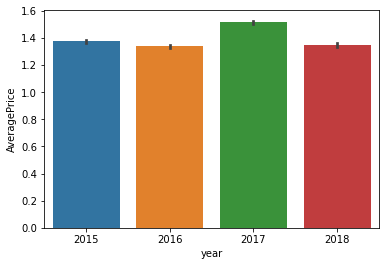

In [75]:
sns.barplot(x='year',y='AveragePrice',data=df)

As we can see 2017 is higher in comparision to other years

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

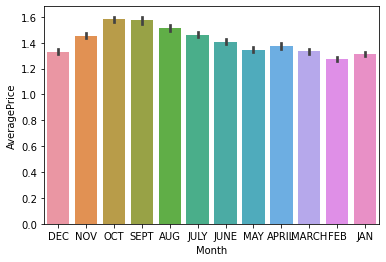

In [76]:
sns.barplot(x='Month',y='AveragePrice',data=df)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

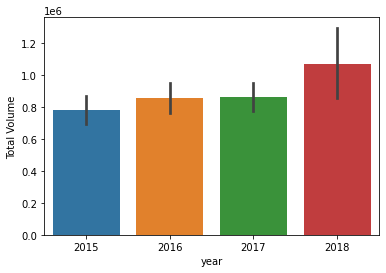

In [77]:
sns.barplot(x='year',y='Total Volume',data=df)

Volume is higher in the year 2018

<AxesSubplot:xlabel='Month,year'>

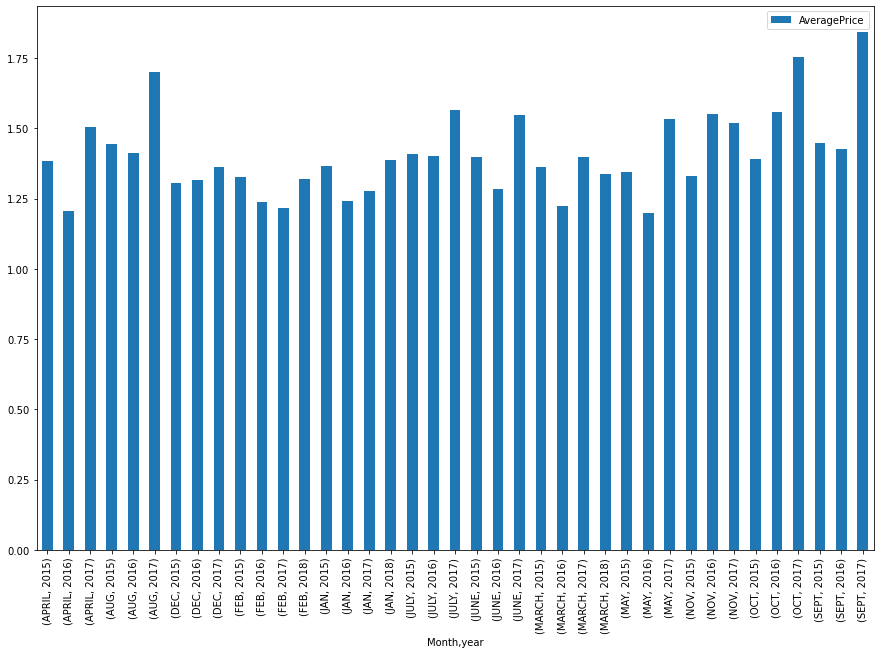

In [78]:
df.groupby(['Month','year']).agg({'AveragePrice':np.mean}).plot.bar(figsize=(15, 10))

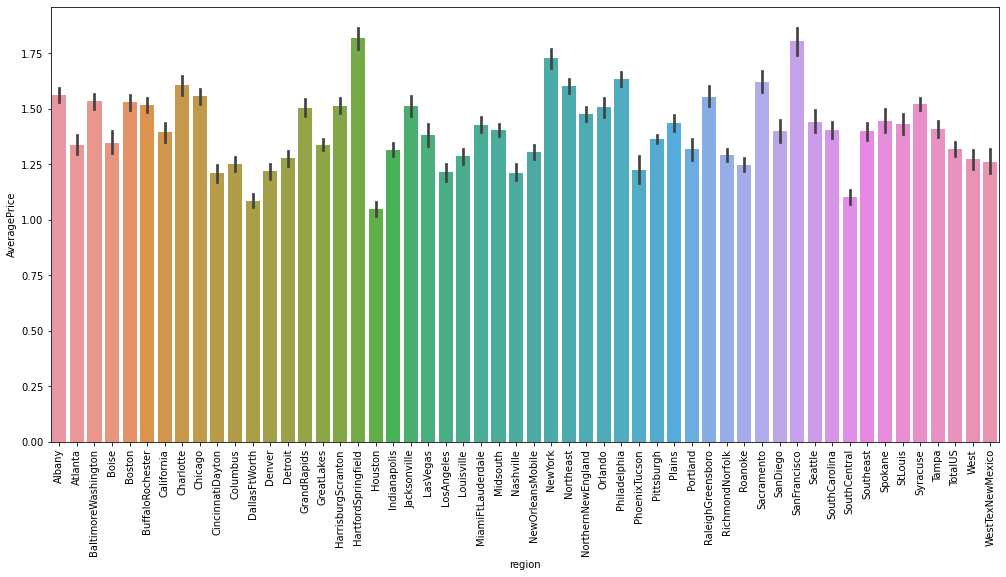

In [79]:
plt.figure(figsize=(17,8))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

Avg price is very low in south central,Columbus,HartfordSpringfield

<AxesSubplot:>

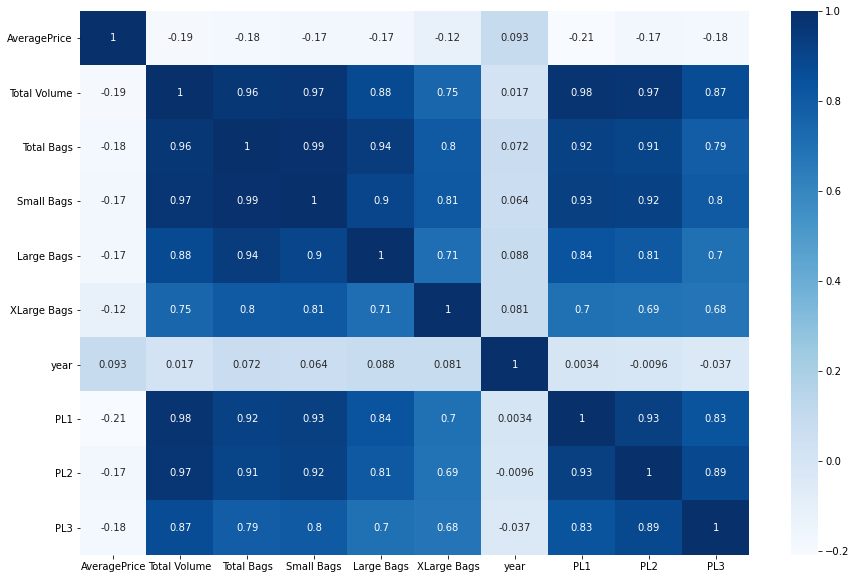

In [80]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Observation:

- We can see that Total Volume is highly co related with almost all the features.

In [81]:
columns=['AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','PL1','PL2','PL3']

In [82]:
df.drop(['type'],axis=1,inplace=True)

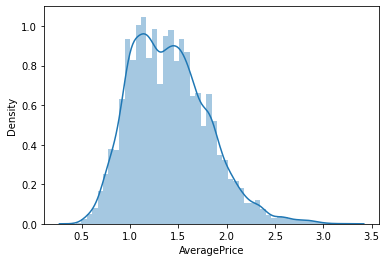

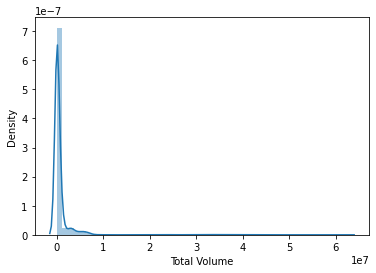

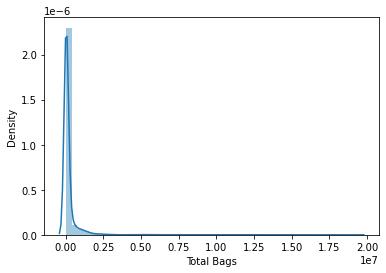

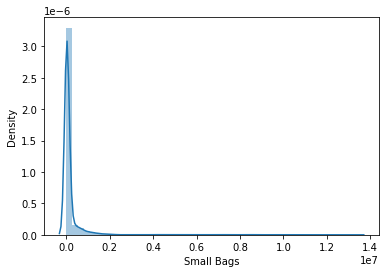

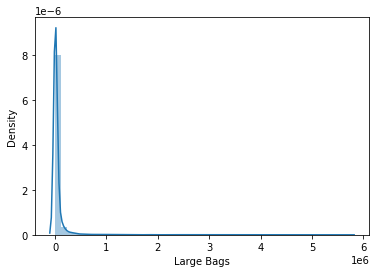

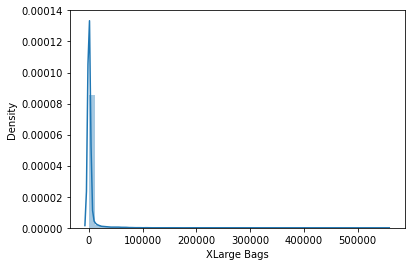

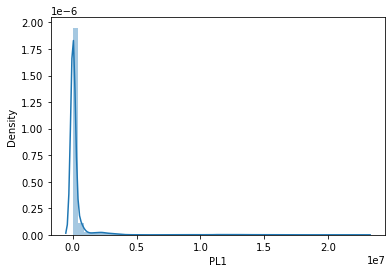

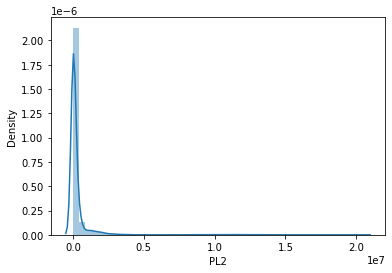

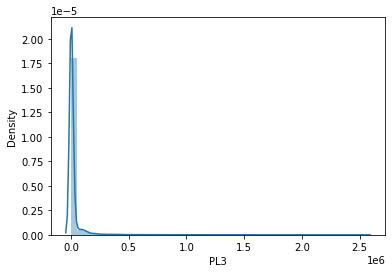

In [83]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

Most of the features are right skewed

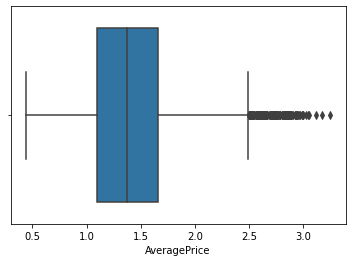

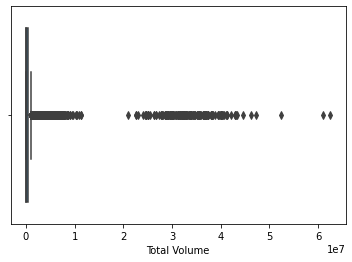

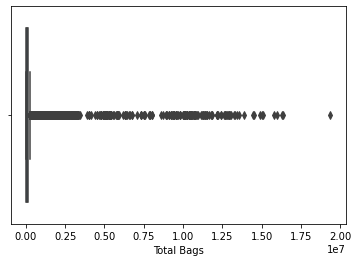

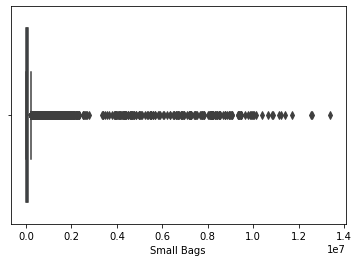

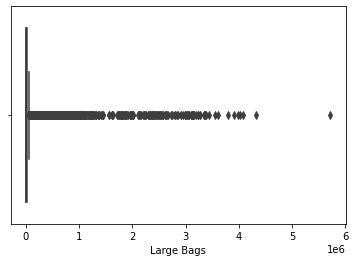

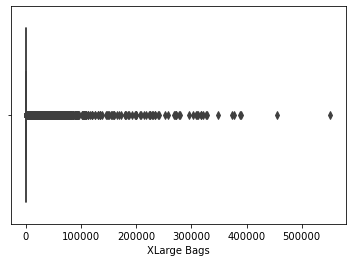

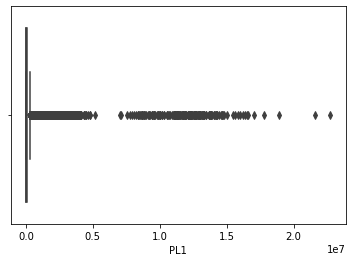

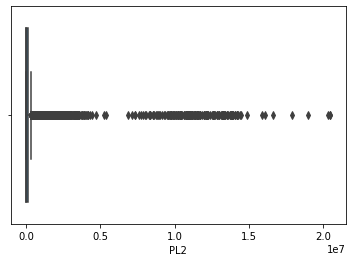

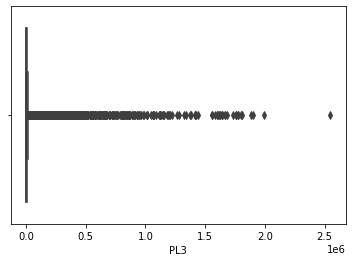

In [84]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are so many outliers present in the dataset,we have to romove it.

#### Now we have to convert the categorical feature into numerical using Label encoder.

In [85]:
columns_cat=['year','Month','region']

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
for i in range(len(columns_cat)):
    df[columns_cat[i]]=le.fit_transform(df[columns_cat[i]])

In [88]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,0,1036.74,54454.85,48.16,2
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,0,674.28,44638.81,58.33,2
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,0,794.70,109149.67,130.50,2
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,0,1132.00,71976.41,72.58,2
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,0,941.48,43838.39,75.78,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,3,53,2046.96,1529.20,0.00,3
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,3,53,1191.70,3431.50,0.00,4
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,3,53,1191.92,2452.79,727.94,4
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,3,53,1527.63,2981.04,727.01,4


Lets treat the outliers using Zscore

In [89]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([8, 8, 5, ..., 0, 0, 0], dtype=int64))


In [90]:
print('shape before removing the outliers:', df.shape)

dfnew=df[(zscr<3).all(axis=1)]

print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (18249, 12)
shape after removing the outliers: (17651, 12)


In [91]:
df=dfnew

NOw lets check for the skewness

In [92]:
for i in columns:
    if df[i].skew()>0.50:
        df[i]=np.log1p(df[i])

In [93]:
df.skew()

AveragePrice    0.377432
Total Volume   -0.049950
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
year            0.229976
region          0.012798
PL1            -0.420273
PL2            -0.604619
PL3             0.068532
Month           0.029197
dtype: float64

# Model Building

In [94]:
#lets split the data first
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
y=pd.DataFrame(data=y)

In [95]:
#now we have to scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
x=pd.DataFrame(sc_x,columns=x.columns)

In [96]:
x

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,-0.061962,-0.473426,-0.215789,-0.648254,-0.627319,-1.210013,-1.695495,-0.587318,0.431565,-0.246207,-1.029537
1,-0.134302,-0.431908,-0.179590,-0.636520,-0.627319,-1.210013,-1.695495,-0.719464,0.359601,-0.199437,-1.029537
2,0.218235,-0.504018,-0.243116,-0.621646,-0.627319,-1.210013,-1.695495,-0.668997,0.683316,-0.001478,-1.029537
3,0.033021,-0.661685,-0.384129,-0.552915,-0.627319,-1.210013,-1.695495,-0.560308,0.532565,-0.145897,-1.029537
4,-0.167601,-0.632653,-0.362677,-0.449388,-0.627319,-1.210013,-1.695495,-0.616931,0.353051,-0.135308,1.062882
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.670586,-0.268139,-0.046548,-0.241763,-0.627319,1.980756,1.747054,-0.378245,-0.861693,-1.215018,-0.730620
17647,-0.765474,-0.443885,-0.200255,-0.317520,-0.627319,1.980756,1.747054,-0.544515,-0.569192,-1.215018,-0.431703
17648,-0.769503,-0.437415,-0.182019,-0.855591,-0.627319,1.980756,1.747054,-0.544458,-0.690718,0.424488,-0.431703
17649,-0.694596,-0.365019,-0.119253,-0.812010,-0.627319,1.980756,1.747054,-0.468195,-0.620126,0.424171,-0.431703


In [97]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.4637177543184906
At random state 0,the testing accuracy is: 0.4612915304404469


At random state 1,the training accuracy is: 0.46164879613027066
At random state 1,the testing accuracy is: 0.4695895748192176


At random state 2,the training accuracy is: 0.46731767954128645
At random state 2,the testing accuracy is: 0.4468171517102444


At random state 3,the training accuracy is: 0.4615270017315871
At random state 3,the testing accuracy is: 0.47023970213015953


At random state 4,the training accuracy is: 0.4620344852430529
At random state 4,the testing accuracy is: 0.46835218381457766


At random state 5,the training accuracy is: 0.45819221588197967
At random state 5,the testing accuracy is: 0.48276932801164507


At random state 6,the training accuracy is: 0.45950623842633287
At random state 6,the testing accuracy is: 0.4778263015445495


At random state 7,the training accuracy is: 0.46331161723057035
At random state 7,the testing accuracy i

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

### SupportVectorRegression model

In [99]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.466018850581166
0.5883759867746001
0.7623832243933277


### Fitting the data to various model and checking the accuracy

In [100]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,kn,ab]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.469657,0.437345,0.083477,0.462497
1,SupportVector,0.762383,0.717730,0.041879,0.738445
2,DecisionTree,1.000000,0.726878,0.040521,0.731665
3,RandomForest,0.982450,0.870151,0.019265,0.875627
4,KNN,0.891615,0.810651,0.028093,0.819195
5,AdaBoost,0.503211,0.476079,0.077731,0.491222


We can say that Random Forest Regressor has performed well with test score of 87% and CV score of 87%. KNN has also performed well with 81% test accuracy and CV score of 81%

We will select RandomForest as our model and Hypertune it to se if there is increase in any accuracy

In [102]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50]}

In [103]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

We got the best parameters for our Random Forest model. We will fit it to re train our model

In [104]:
Finalmod=RandomForestRegressor(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=r2_score(y_test,pred)
MSE = mean_squared_error(y_test,pred_test)
cvs_score=cross_val_score(Finalmod,x,y,cv=kf)

print('Accuracy Score of RandomForest is',acc*100)
print('Mean Square Error is',MSE)
print('Cross Vaidation Score is', cvs_score.mean()*100)

Accuracy Score of RandomForest is 86.3090399594869
Mean Square Error is 0.07773071440380061
Cross Vaidation Score is 86.58611824682218


### There is a slight incrase in the model performance with Accuracy score of 86% and CV score of 86%

# Lets Visualize our model

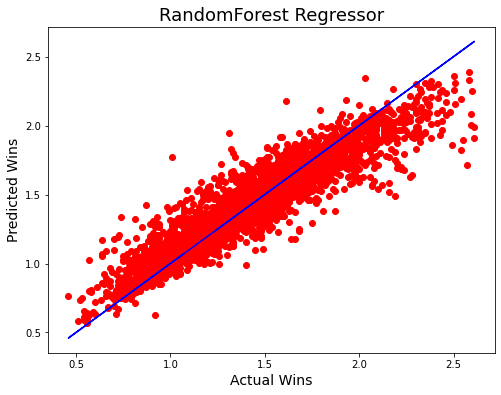

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('RandomForest Regressor',fontsize=18)
plt.show()

# Saving the Model

In [107]:
import joblib
joblib.dump(Finalmod,'Avacodo_Price_Predictions.obj')

['Avacodo_Price_Predictions.obj']